In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
%cd '/gdrive/MyDrive/LDS0_K273_ONLINE_DoThiPhuong/Presentation/Project3/'

/gdrive/MyDrive/LDS0_K273_ONLINE_DoThiPhuong/Presentation/Project3


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# read data
data = pd.read_csv('foody_08032022.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22734 entries, 0 to 22733
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   restaurant    22734 non-null  object 
 1   review_text   22734 non-null  object 
 2   review_score  22734 non-null  float64
dtypes: float64(1), object(2)
memory usage: 533.0+ KB


In [ ]:
data = data.drop_duplicates()
data.shape

(22734, 3)

In [ ]:
data[data.isna().T.any()]

,restaurant,review_text,review_score


In [ ]:
data[data.isnull().T.any()]

,restaurant,review_text,review_score


Không có dữ liệu trùng/NaN/null

In [ ]:
len(data.restaurant.unique())

567

## Dữ liệu do học viên tự cào với 22734 records (reviews) cho 567 nhà hàng.

In [ ]:
data.head()

,restaurant,review_text,review_score
0,Chả Cá Hà Nội Xưa,"Nhà hàng mới đổi địa chỉ sang 24 Hồng Hà, khá ...",8.8
1,Chả Cá Hà Nội Xưa,Quán đã chuyển về 22 Hồng Hà cới phong cách kh...,3.2
2,Chả Cá Hà Nội Xưa,"Giá niêm yết trên foody một kiểu, giá lúc ship...",3.2
3,Chả Cá Hà Nội Xưa,Xem review thấy mọi người khen chả cá lã vọng ...,7.0
4,Chả Cá Hà Nội Xưa,Tối nay mới đi ăn quán này món chả cá lã vọng ...,9.2


In [ ]:
data.tail()

,restaurant,review_text,review_score
22729,Rodstarz FastFood Restaurant - Trương Công Định,Hôm nay trời mưa hội bạn của mình rủ đi ăn món...,7.0
22730,Rodstarz FastFood Restaurant - Trương Công Định,Lâu lâu chạy ngang thấy quán có món ăn mới nên...,7.0
22731,Rodstarz FastFood Restaurant - Trương Công Định,"Vị trí thuận lợi dễ tìm, tuy vậy không gian kh...",7.8
22732,Rodstarz FastFood Restaurant - Trương Công Định,"Vào ""ăn sáng"" nhưng được giá cơm trưa. Chị nhâ...",8.4
22733,Rodstarz FastFood Restaurant - Trương Công Định,"Địa điểm quen thuộc của nhóm mình, bọn mình ăn...",7.0


In [ ]:
restaurant_ = data.groupby('restaurant')['review_text'].count().sort_values(ascending = False)
restaurant_

restaurant
3 Hiền - Bún Đậu Mắm Tôm - Đường 3 Tháng 2                   100
Gà Rán KFC - Vinmart - Vinatex Cần Thơ                       100
Sủi Cảo Thiên Thiên - Hà Tôn Quyền                           100
Phiphi - Sushi Nhật & Hàn Food                               100
Bánh Xèo Bà Dưỡng                                            100
                                                            ... 
Trà Sữa House Of Cha - Trần Hữu Dực                            1
Family Chicken - Gà Rán, Bánh Gà & Đồ Ăn Vặt - Chùa Quỳnh      1
Trà Sữa Mixue - Xuân Thủy                                      1
GuChi - Tokbokki, KimBap & Cơm Trộn - Phạm Văn Đồng            1
Tocotoco - Lĩnh Nam                                            1
Name: review_text, Length: 567, dtype: int64

Một số nhà hàng có nhiều reviews nhất là 100 reviews. Một số nhà hàng chỉ có 1 review.

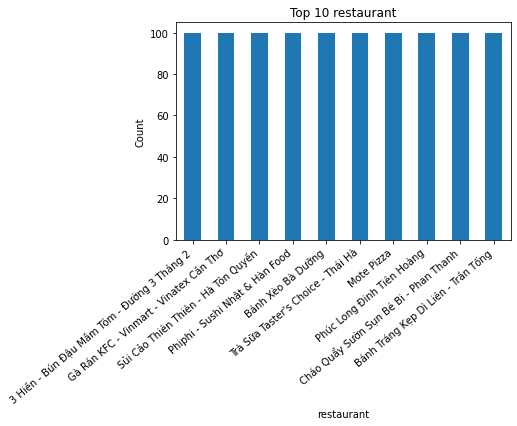

In [ ]:
# top 10
restaurant_[0:10].plot(kind = 'bar')
plt.ylabel('Count')
plt.xticks(rotation=40,ha='right')
plt.title("Top 10 restaurant")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count')

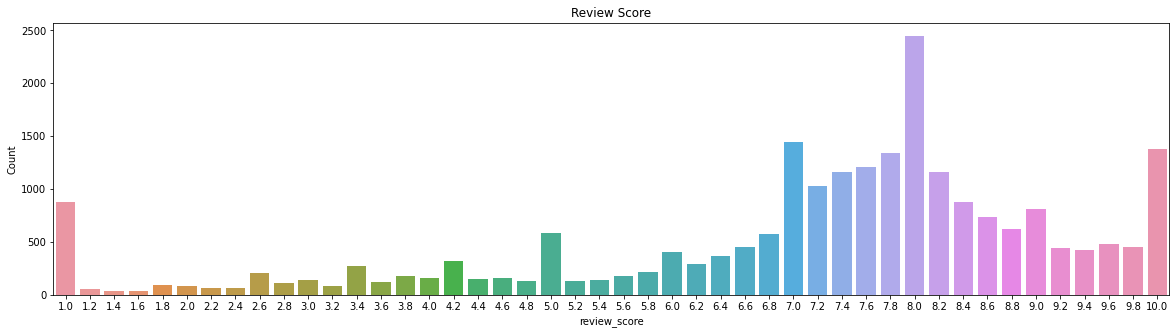

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(data['review_score'])
plt.title("Review Score")
plt.xlabel('review_score')
plt.ylabel('Count')

Hầu hết người dùng cho điểm khá cao từ 7.0 trở lên. Nhiều nhất ở mức 8.0 điểm. Ngoài ra có một số mốc đáng chú ý như 1.0; 5.0; 7.0, 8.0, 9.0 và 10.0.

In [ ]:
avg_score = data.groupby('restaurant')['review_score'].mean().sort_values(ascending = False)
avg_score

restaurant
Bánh Sầu Riêng 9 Sạch - Lê Lợi                                         10.000000
Tmore - Tiệm Trà Chanh - Thượng Đình                                   10.000000
Kudoo Tea - Trà Sữa Kem Cheese _Trà Hoa Quả Tươi Mát - Phùng Khoang    10.000000
Quán Tía Tô - Bún, Cháo Lòng & Cơm Các Loại                            10.000000
Xuân Food - Mì Trộn Indomie                                            10.000000
                                                                         ...    
Cơm Chay Văn Phòng 36K - Đường Bưởi                                     2.400000
Cơm Rang Gà Sốt 30K - Mỹ Đình                                           1.942857
TocoToco Bubble Tea - Tạ Quang Bửu                                      1.800000
Royaltea - Calmette                                                     1.600000
Hapi - Hamburger Bò Teriyaki - Điện Biên Phủ                            1.000000
Name: review_score, Length: 567, dtype: float64

Một số nhà hàng có điểm trung bình cao nhất là 10.0 điểm. Một số nhà hàng có điểm trung bình thấp nhất là 1.0-2.4 điểm.

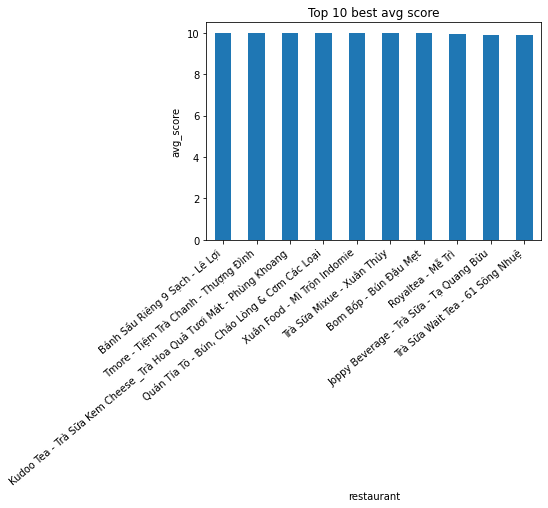

In [ ]:
# top 10
avg_score[0:10].plot(kind = 'bar')
plt.ylabel('avg_score')
plt.xticks(rotation=40,ha='right')
plt.title("Top 10 best avg score")
plt.show()

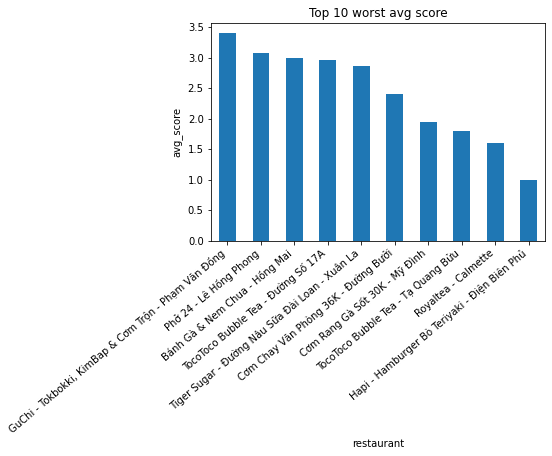

In [ ]:
# top 10
avg_score[-10:].plot(kind = 'bar')
plt.ylabel('avg_score')
plt.xticks(rotation=40,ha='right')
plt.title("Top 10 worst avg score")
plt.show()

Việc đánh giá và cho điểm của khách hàng dựa trên cảm xúc cá nhân và phụ thuộc vào nhiều yếu tố như chất lượng đồ ăn, dịch vụ, thái độ, không gian, giá cả... Có thể trong cùng 1 review có khen điểm này nhưng chưa hài lòng ở điểm khác. Với mỗi khách hàng sẽ có cảm nhận riêng và cách chấm điểm khác nhau.